In [1]:
import pandas as pd

In [2]:
# Dataset source : https://www.kaggle.com/code/rahulkumarpatro/multi-class-text-classification-using-lstms/input
df = pd.read_csv("bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [4]:
df.shape

(2225, 2)

In [5]:
df.category.value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [6]:
df.isnull().sum()

category    0
text        0
dtype: int64

<Axes: >

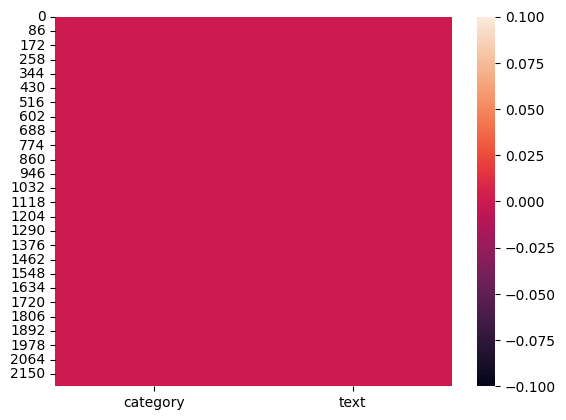

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.isnull())

In [8]:
df.shape

(2225, 2)

In [9]:
df.text[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [10]:
df["target_encoded"] = df.category.replace({
    "sport" : 0,    
    "business" : 1,       
    "politics" : 2,       
    "tech" : 3,           
    "entertainment" : 4 
})
df.head(10)

,category,text,target_encoded
0,tech,tv future in the hands of viewers with home th...,3
1,business,worldcom boss left books alone former worldc...,1
2,sport,tigers wary of farrell gamble leicester say ...,0
3,sport,yeading face newcastle in fa cup premiership s...,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,4
5,politics,howard hits back at mongrel jibe michael howar...,2
6,politics,blair prepares to name poll date tony blair is...,2
7,sport,henman hopes ended in dubai third seed tim hen...,0
8,sport,wilkinson fit to face edinburgh england captai...,0
9,entertainment,last star wars not for children the sixth an...,4


In [11]:
df.target_encoded.unique()

array([3, 1, 0, 4, 2], dtype=int64)

In [12]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing Punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Removing Stop Words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocessing

In [13]:
df["text_preprocessed"] = df["text"].apply(preprocess_text)

In [14]:
df.head()

,category,text,target_encoded,text_preprocessed
0,tech,tv future in the hands of viewers with home th...,3,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left book alon former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,0,tiger wari farrel gambl leicest say rush make ...
3,sport,yeading face newcastle in fa cup premiership s...,0,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,4,ocean twelv raid box offic ocean twelv crime c...


# Feature Extraction

In [15]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [16]:
sample = nlp(df["text_preprocessed"][0]).vector
sample

array([-0.38013816,  1.1682726 , -1.7587487 ,  0.04838296,  1.1702216 ,
        0.13734847,  0.89060587,  2.7768164 , -1.9323146 , -0.90927494,
        3.3031557 ,  1.1215954 , -3.5215566 ,  1.2074455 , -0.07656684,
        0.859178  ,  1.9866292 ,  0.25065625, -0.046534  , -0.03984215,
        0.4683401 ,  0.5652873 , -1.3271399 , -0.75515735, -0.91721004,
       -0.68264484, -1.4934808 , -0.80023766, -0.3436121 ,  1.0360111 ,
        0.14195538,  0.03629491, -0.40950838, -1.3550855 ,  0.83316135,
        0.04876614,  0.08682808,  0.94127214,  1.6961207 ,  0.869003  ,
       -0.37072337, -0.26635894,  0.7656166 , -0.01311705,  0.64619005,
        0.36246175,  0.40710664, -1.1739523 ,  0.65461665,  0.49682212,
       -0.27014476,  1.0488808 ,  0.15639456, -2.0293705 , -1.365725  ,
        0.5723696 , -0.64636165,  1.1577721 ,  0.343832  , -0.05048744,
        1.4649494 ,  0.45737627, -1.3817242 , -1.4173714 ,  0.9717742 ,
        0.8453951 , -3.4097784 , -1.9021418 ,  0.09834944,  1.63

In [17]:
sample.shape

(300,)

In [18]:
df["vector"] = df["text_preprocessed"].apply(lambda x : nlp(x).vector)

In [19]:
df.head(10)

,category,text,target_encoded,text_preprocessed,vector
0,tech,tv future in the hands of viewers with home th...,3,tv futur hand viewer home theatr system plasma...,"[-0.38013816, 1.1682726, -1.7587487, 0.0483829..."
1,business,worldcom boss left books alone former worldc...,1,worldcom boss left book alon former worldcom b...,"[-0.5862563, -0.25287616, -0.9815649, 0.005595..."
2,sport,tigers wary of farrell gamble leicester say ...,0,tiger wari farrel gambl leicest say rush make ...,"[0.02817186, 1.2346219, -1.1027576, 0.19421561..."
3,sport,yeading face newcastle in fa cup premiership s...,0,yead face newcastl fa cup premiership side new...,"[-2.2239552, -0.36410365, 0.7777065, 0.1340072..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,4,ocean twelv raid box offic ocean twelv crime c...,"[-1.1080321, -0.485456, -1.6493933, -0.2265132..."
5,politics,howard hits back at mongrel jibe michael howar...,2,howard hit back mongrel jibe michael howard sa...,"[-0.8132931, 0.43609774, -1.5236981, 0.3524837..."
6,politics,blair prepares to name poll date tony blair is...,2,blair prepar name poll date toni blair like na...,"[-0.41940087, 0.115218796, -1.2572672, 0.61634..."
7,sport,henman hopes ended in dubai third seed tim hen...,0,henman hope end dubai third seed tim henman sl...,"[-1.0761664, -0.2658284, -0.56526554, 2.549056..."
8,sport,wilkinson fit to face edinburgh england captai...,0,wilkinson fit face edinburgh england captain j...,"[-1.0137652, 0.356078, -0.69939834, 0.9770157,..."
9,entertainment,last star wars not for children the sixth an...,4,last star war children sixth final star war mo...,"[-0.42904115, 0.882795, -1.9065573, -0.7744452..."


In [20]:
from sklearn.model_selection import train_test_split
X = df.vector.values
y = df.target_encoded
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2002,) (2002,)
(223,) (223,)


In [21]:
import numpy as np
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_2d,y_train)

y_pred_rf = rf_clf.predict(X_test_2d)

print(classification_report(y_test,y_pred_rf))

print("Testing Accuracy: "+ str(accuracy_score(y_test,y_pred_rf)*100))

C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       0.93      0.90      0.91        48
           1       0.84      0.89      0.86        46
           2       0.85      0.85      0.85        47
           3       0.95      0.97      0.96        38
           4       0.90      0.86      0.88        44

    accuracy                           0.89       223
   macro avg       0.90      0.90      0.89       223
weighted avg       0.89      0.89      0.89       223

Testing Accuracy: 89.23766816143498


C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_rf))

[[43  0  2  0  3]
 [ 0 41  5  0  0]
 [ 0  6 40  0  1]
 [ 1  0  0 37  0]
 [ 2  2  0  2 38]]


C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [24]:
def predict_sentence(text):
    vector_text = nlp(text).vector
    vector_text_2d = np.stack(vector_text)
    vector_text_2d = vector_text_2d.reshape(1, -1) 
    result = rf_clf.predict(vector_text_2d)
    if result[0] == 0:
        result = "sport"
    elif result[0] == 1:
        result = "business"
    elif result[0] == 2:
        result = "politics"
    elif result[0] == 3:
        result = "tech"
    else:
        result = "entertainment"
#    "sport" : 0,    
#     "business" : 1,       
#     "politics" : 2,       
#     "tech" : 3,           
#     "entertainment" : 4 
    return result

In [35]:
text1 = "Additionally, the microsite on Amazon.in highlights some of the key features of the Mi 10. It shows that the phone will come with a 108-megapixel primary camera that will have optical image stabilisation (OIS) and 8K video recording. The microsite also claims that the Mi 10 will carry the worlds fastest wireless charging and include Qualcomm Snapdragon 865 SoC. You can also expect a 3D curved TrueColor E3 AMOLED display with a Corning Gorilla Glass protection on top and stereo speakers."
text2 = "In an increasingly interconnected world, we believe that diplomacy, collaboration, and international cooperation should be the cornerstones of our foreign policy, promoting peace and prosperity for all."

In [36]:
result_text1 = predict_sentence(text1)
result_text1

'tech'

In [37]:
result_text2 = predict_sentence(text2)
result_text2

'politics'

In [28]:
text3 = "Flipkart revealed the different items that Indians are looking for on the e-commerce site, as relaxing lockdown restrictions allow shopping to start again. Self-care and items to help work from home top the list, according to the e-commerce giant."

In [29]:
result_text3 = predict_sentence(text3)
result_text3

'tech'

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

KNN_clf = KNeighborsClassifier()

KNN_clf.fit(X_train_2d,y_train)

y_pred_KNN = KNN_clf.predict(X_test_2d)

print(classification_report(y_test,y_pred_KNN))

print("Testing Accuracy: "+ str(accuracy_score(y_test,y_pred_KNN)*100))

C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.91      0.89      0.90        46
           2       0.90      0.94      0.92        47
           3       0.92      0.95      0.94        38
           4       0.97      0.89      0.93        44

    accuracy                           0.93       223
   macro avg       0.93      0.93      0.93       223
weighted avg       0.93      0.93      0.93       223

Testing Accuracy: 92.82511210762333


C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [31]:
def predict_sentence_knn(text):
    vector_text = nlp(text).vector
    vector_text_2d = np.stack(vector_text)
    vector_text_2d = vector_text_2d.reshape(1, -1) 
    result = KNN_clf.predict(vector_text_2d)
    if result[0] == 0:
        result = "sport"
    elif result[0] == 1:
        result = "business"
    elif result[0] == 2:
        result = "politics"
    elif result[0] == 3:
        result = "tech"
    else:
        result = "entertainment"
#    "sport" : 0,    
#     "business" : 1,       
#     "politics" : 2,       
#     "tech" : 3,           
#     "entertainment" : 4 
    return result

In [32]:
result_text1 = predict_sentence_knn(text1)
result_text1

'tech'

In [38]:
result_text2 = predict_sentence_knn(text2)
result_text2

'politics'

In [34]:
result_text3 = predict_sentence_knn(text3)
result_text3

'tech'